# 逻辑斯蒂回归
## 以条件概率表示分布分类的模型
### 以二项逻辑斯蒂回归模型为例
$$
P(Y=1|x) = \frac {\exp (w_k \cdot x + b)} {1 +  {\exp (w_k \cdot x + b)}} \\
P(Y=0|x) = \frac {1} {1 +  {\exp (w_k \cdot x + b)}}
$$

### 模型
$$
f(x) = \frac {1} {1 + \exp ^{-wx}} \\
wx = w_0 \cdot x_0 + w_1 \cdot x_1 + \cdots + w_n \cdot x_n, (x_0 = 1)
$$

## 例1 已知数据集D，正实例点(Y=1)是$x_1 = (3, 3, 3)^T, x_2 = (4, 3, 2)^T, x_3 = (2, 1, 2)^T$, 负实例点(Y=0)是$x_4 = (1, 1, 1)^T, x_5 = (-1, 0, 1)^T, x_6 = (2, -2, 1)^T$对点(1, 2, -2)^T分类

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# 数据点 训练集
X_train = np.array([[3, 3, 3], [4, 3, 2], [2, 1, 2], [1, 1, 1], [-1, 0, 1], [2, -2, 1]])
y_train = np.array([[1, 1, 1, 0, 0, 0]])

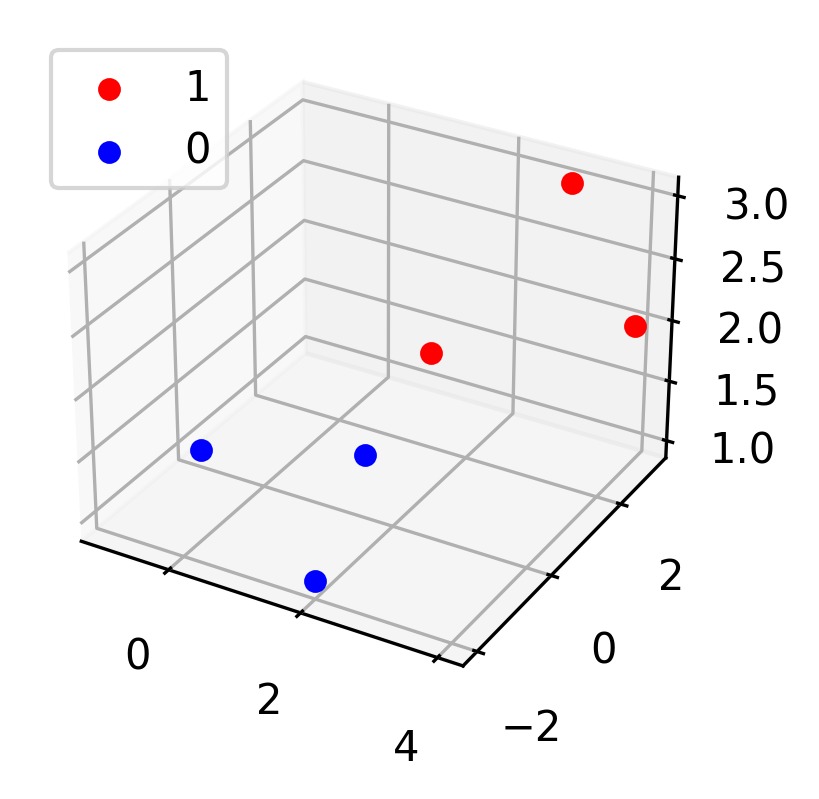

In [20]:
figure = plt.figure(figsize= (4, 3), dpi = 300)
ax = plt.axes(projection = '3d')
ax.scatter(X_train[0][0], X_train[0][1], X_train[0][2], c = 'r', label = "1")
ax.scatter(X_train[1][0], X_train[1][1], X_train[1][2], c = 'r')
ax.scatter(X_train[2][0], X_train[2][1], X_train[2][2], c = 'r')
ax.scatter(X_train[3][0], X_train[3][1], X_train[3][2], c = 'b', label = '0')
ax.scatter(X_train[4][0], X_train[4][1], X_train[4][2], c = 'b',)
ax.scatter(X_train[5][0], X_train[5][1], X_train[5][2], c = 'b')
ax.legend(loc='best')

plt.show()

In [26]:
# 逻辑斯蒂回归 - 梯度下降法
class LogisticRegression:
    def __init__(self, learn_rate = 0.1, max_iter = 100, tol = 1e-2):
        self.learn_rate = learn_rate
        self.max_iter = max_iter
        self.tol = tol
        self.w = None
        
    def preprocessing(self, X):
        """
        X末尾加一列 全为1
        """
        row = X.shape[0]
        y = np.ones(row).reshape(row, 1)
        X_prepro = np.hstack((X, y))
        return X_prepro
    
    def sigmod(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X_train, y_train):
        X = self.preprocessing(X_train)
        y = y_train.T
        
        # 初始化权重
        self.w = np.array([[0] * X.shape[1]], dtype = np.float)
        k = 0
        for loop in range(self.max_iter):
            z = np.dot(X, self.w.T)
            grad = X * (y - self.sigmod(z))
            grad = grad.sum(axis = 0)
            
            # conditon
            if (np.abs(grad) <= self.tol).all():
                break
            else:
                # Update weight
                self.w += self.learn_rate * grad
                k += 1
        
        print("迭代次数: {}次".format(k))
        print("最终梯度: {}".format(grad))
        print("最终权重: {}".format(self.w[0]))
        
    def predict(self, x):
        p = self.sigmod(np.dot(self.preprocessing(x), self.w.T))
        print("Y=1的概率被估计为：{:.2f}".format(p[0][0]))
        p[np.where(p>0.5)] = 1
        p[np.where(p<0.5)] = 0
        return p


In [27]:
# create mdoel 
model = LogisticRegression()
model.fit(X_train, y_train)


迭代次数: 100次
最终梯度: [ 0.04661988  0.00420325  0.07100073 -0.19141795]
最终权重: [ 1.30300331  1.21428336  0.30807394 -3.32514839]


/var/folders/yp/wfh2w2w17rq1vxz3yymtt2rm0000gn/T/ipykernel_840/614244725.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.w = np.array([[0] * X.shape[1]], dtype = np.float)


In [28]:
X_new = np.array([[1, 2, -2]])
model.predict(X_new)

Y=1的概率被估计为：0.45


array([[0.]])

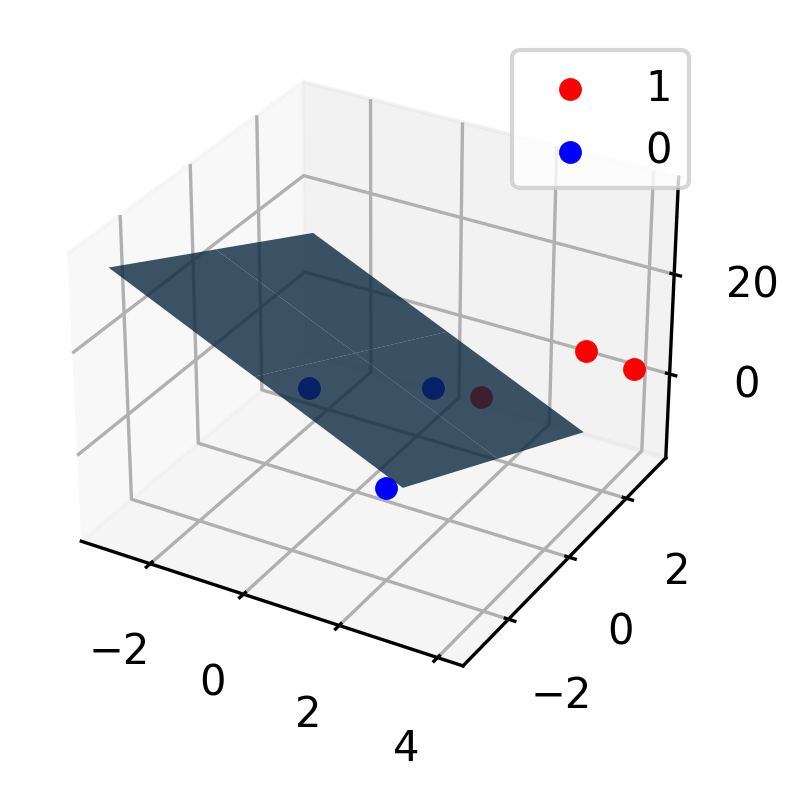

In [31]:
figure = plt.figure(figsize= (4, 3), dpi = 300)
ax = plt.axes(projection = '3d')
ax.scatter(X_train[0][0], X_train[0][1], X_train[0][2], c = 'r', label = "1")
ax.scatter(X_train[1][0], X_train[1][1], X_train[1][2], c = 'r')
ax.scatter(X_train[2][0], X_train[2][1], X_train[2][2], c = 'r')
ax.scatter(X_train[3][0], X_train[3][1], X_train[3][2], c = 'b', label = '0')
ax.scatter(X_train[4][0], X_train[4][1], X_train[4][2], c = 'b',)
ax.scatter(X_train[5][0], X_train[5][1], X_train[5][2], c = 'b')

x = np.linspace(-3, 3, 3)
y = np.linspace(-3, 3, 3)
x_3, y_3 = np.meshgrid(x, y)
a, b, c, d =  [1.30300331,  1.21428336,  0.30807394, -3.32514839]
z_3 = - (a * x_3 + b * y_3 + d) / c
ax.plot_surface(x_3, y_3, z_3, alpha = 0.8)

ax.legend(loc='best')

plt.show()